<a href="https://colab.research.google.com/github/edmee1/Tarrification_assurance/blob/main/Code_concis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importations

##Librairies

In [2]:
from pathlib import Path
import pandas as pd
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import random
import datetime

import seaborn as sns

##Fichiers

In [3]:
data_merge=pd.read_csv("/content/merge3.csv")

In [4]:
secteur=pd.read_excel('SIC_industrial classification.xlsx')

In [5]:
del data_merge['Unnamed: 0']

In [6]:
secteur.head()

,SIC Code,Office,Industry Title
0,100,Industrial Applications and Services,AGRICULTURAL PRODUCTION-CROPS
1,200,Industrial Applications and Services,AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES
2,700,Industrial Applications and Services,AGRICULTURAL SERVICES
3,800,Industrial Applications and Services,FORESTRY
4,900,Industrial Applications and Services,"FISHING, HUNTING AND TRAPPING"


#Description

In [ ]:
grouped = data_merge.groupby(['companyName', 'industry']).aggregate( {'ESGRiskRating': ['mean','max','min'], 'year':['min','max']})
grouped = grouped.reset_index( level = [0 , 1] )
grouped.columns = ['companyName','Industry','ESGRiskRating_moyenne','ESGRiskRating min','ESGRiskRating max','YEAR_min','Year_max']
print(len(grouped))
grouped.head()

3007


,companyName,Industry,ESGRiskRating_moyenne,ESGRiskRating min,ESGRiskRating max,YEAR_min,Year_max
0,10X Capital Venture Acquisition Corp. II,BLANK CHECKS,5.000000,5,5,2021,2021
1,12 Retech Corp,SERVICES-COMPUTER PROGRAMMING SERVICES,4.200000,5,4,2017,2021
2,17 Education & Technology Group Inc.,SERVICES-EDUCATIONAL SERVICES,4.000000,4,4,2020,2021
3,180 Life Sciences Corp.,PHARMACEUTICAL PREPARATIONS,4.333333,5,4,2019,2021
4,1847 Holdings LLC,SERVICES-MANAGEMENT CONSULTING SERVICES,4.250000,5,4,2018,2021


<BarContainer object of 15 artists>

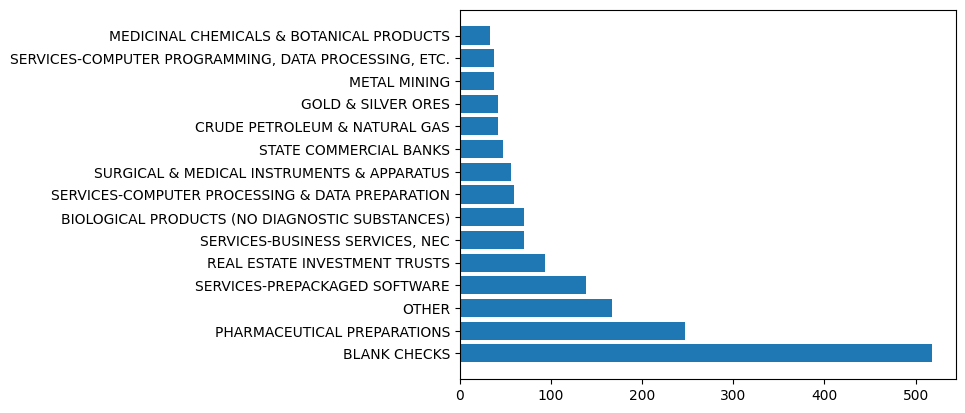

In [ ]:
tab_freq = pd.Series(grouped['Industry']).value_counts().sort_index().reset_index().reset_index(drop=True)
tab_freq.columns = ['Industry', 'Frequency']
tab_freq =tab_freq.sort_values(by='Frequency', ascending=False)
tab_freq=tab_freq.head(15)

tab_freq =tab_freq.sort_values(by='Frequency', ascending=False)
plt.barh(tab_freq["Industry"],tab_freq["Frequency"])

# Lien ESG Risk, ESG rating

<Axes: xlabel='ESGRiskRating', ylabel='ESGScore'>

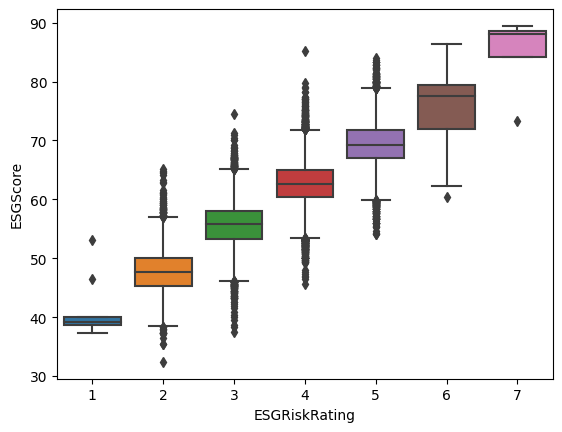

In [ ]:
X1=data_merge["ESGScore"]
Y1=data_merge["ESGRiskRating"]
sns.boxplot( x=Y1, y=X1 )

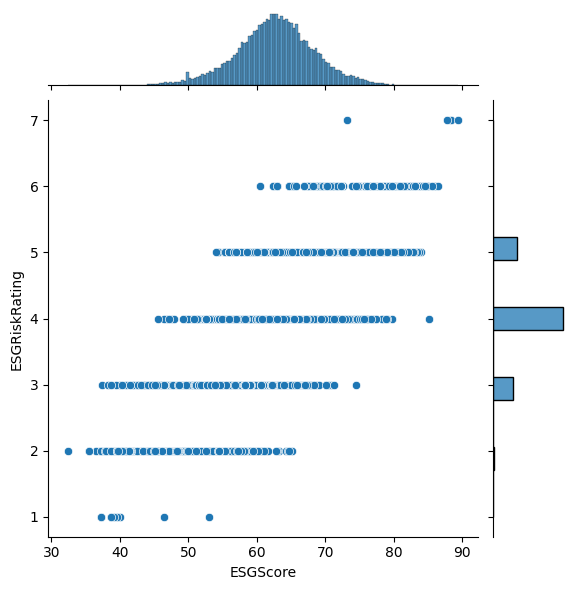

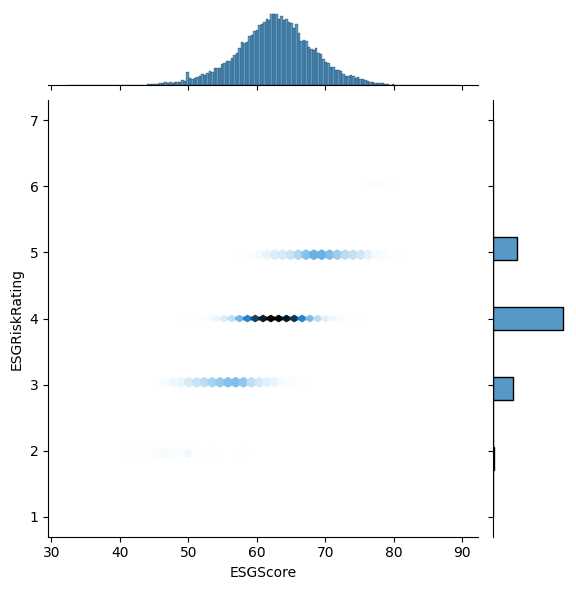

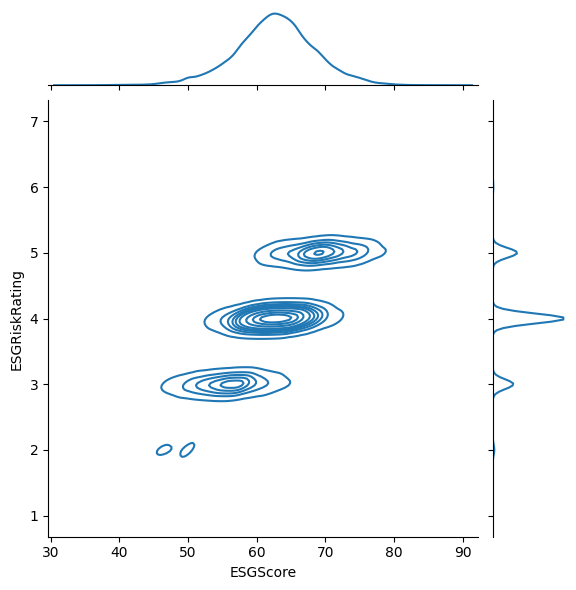

In [ ]:
sns.jointplot(x=X1, y=Y1, kind='scatter')
sns.jointplot(x=X1, y=Y1, kind='hex')
sns.jointplot(x=X1, y=Y1, kind='kde')

plt.show()

#Classification par seceteur

In [63]:
data_merge=pd.merge(data_merge, secteur, left_on='industry', right_on='Industry Title', how='left')

In [64]:
print(len(data_merge['Office']))
print(data_merge['Office'].isna().sum())
print(1-data_merge['Office'].isna().sum()/len(data_merge['Office']))

60219
7488
0.8756538633985951


On a réussi a faire correspondre 87% des secteur d'entreprise

In [65]:
data_merge["Office"]= data_merge["Office"].fillna("Other")

In [66]:
secteur_init=secteur["Office"].unique().tolist()
office=data_merge["Office"].unique().tolist()
office

['Finance',
 'Real Estate & Construction',
 'Trade & Services',
 'Other',
 'Energy & Transportation',
 'Manufacturing',
 'Life Sciences',
 'Technology',
 'Industrial Applications and Services',
 'Finance or Crypto Assets']

In [67]:
difference = set(secteur_init) - set(office)
difference

{'Crypto Assets', 'International Corp Fin', 'Structured Finance'}

In [68]:
import pandas as pd

nb_entreprise = data_merge.groupby('Office')['companyName'].count().reset_index()

nb_entreprise = nb_entreprise.rename(columns={"companyName": "Nombre d'entrprise"})
nb_entreprise


,Office,Nombre d'entrprise
0,Energy & Transportation,5661
1,Finance,7277
2,Finance or Crypto Assets,215
3,Industrial Applications and Services,5589
4,Life Sciences,4996
5,Manufacturing,5858
6,Other,7488
7,Real Estate & Construction,9397
8,Technology,5630
9,Trade & Services,8108


<BarContainer object of 10 artists>

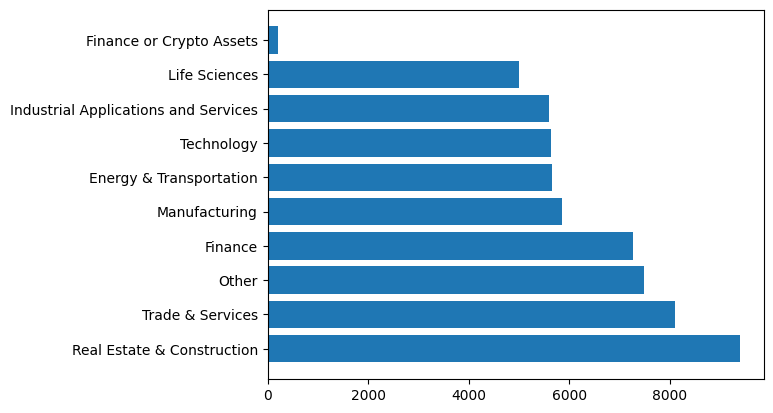

In [69]:
tab_nb =nb_entreprise.sort_values(by="Nombre d'entrprise", ascending=False)
plt.barh(tab_nb["Office"],tab_nb["Nombre d'entrprise"])

#Risk ESG par industrie

In [ ]:
column_excluded=["environmentalScore","socialScore","ESGScore","governanceScore","Unnamed: 0","ESGRiskRating","year",'symbol',"period"]

##Variables en fonction de l'industry

In [86]:
def riskrating_byindustry(industry):
  # On filtre le DataFrame pour le secteur donné
  df=data_merge[data_merge["industry"]==industry]

  #On exclue les risques ESG avec peu de valeur
  counts = df["ESGRiskRating"].value_counts()
  excluded_ratings = counts[counts < len(df)/30].index
  df = df[~df["ESGRiskRating"].isin(excluded_ratings)]

  # on garde les colonnes pertinentes
  column_excluded=["environmentalScore","socialScore","ESGScore","governanceScore","Unnamed: 0","ESGRiskRating","year",'symbol',"period"]
  l=df.columns
  columns_to_keep=[x for x in l if x not in column_excluded]


  # Calcul des médianes groupées par ESGRiskRating
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
  medians = medians.transpose()

  # Afficher le DataFrame avec une belle mise en forme
  with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,'display.float_format', lambda x: '%.2f' % x
                       ):
    display(medians.style.background_gradient(axis=1,cmap="GnBu"))


Fonction qui prend en entrée l'industry souhaité

In [83]:
grouped=data_merge.groupby('industry')['ESGRiskRating'].count()
grouped = grouped.reset_index( level = 0 )
grouped.columns = ['industry','Nb']

pl2 = grouped.sort_values(by=['Nb'], ascending=False)
industry=pl2[0:20]["industry"].tolist()

In [87]:
for i in industry:
  print(i)
  riskrating_byindustry(i)

PHARMACEUTICAL PREPARATIONS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.689509,1.438718,1.447824
daysOfSalesOutstanding,26.762713,35.909040,67.660133
grossProfitMargin,0.482850,0.554568,0.373308
operatingProfitMargin,-7.496250,-2.245325,-2.304460
pretaxProfitMargin,-1.113025,-1.638535,-2.606590
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.444644,-0.812995,-0.701774
returnOnCapitalEmployed,-0.097299,-0.235410,-0.152621
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-0.998599,0.107134,0.120992


BLANK CHECKS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.432257,0.937615,1.704549
daysOfSalesOutstanding,3.846684,11.496738,223.889836
grossProfitMargin,0.749003,0.352090,0.358004
operatingProfitMargin,-0.424514,-1.405544,-8.710474
pretaxProfitMargin,0.000000,-1.505210,-9.259592
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.213650,0.005143,0.005066
returnOnCapitalEmployed,-0.004845,-0.014868,-0.014054
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.002172,-1.033712,-1.041422


REAL ESTATE INVESTMENT TRUSTS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,1.559233,1.523777,1.631852
daysOfSalesOutstanding,56.147221,45.188964,67.873034
grossProfitMargin,0.609376,0.557698,0.347494
operatingProfitMargin,0.149065,0.156738,0.058882
pretaxProfitMargin,0.010869,0.079646,0.245036
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,0.003180,0.009910,0.014856
returnOnCapitalEmployed,0.022623,0.026704,0.025243
netIncomePerEBT,0.987729,0.981345,0.987396
debtEquityRatio,1.098731,1.325950,3.007835


SERVICES-PREPACKAGED SOFTWARE


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.108314,0.531419,0.991919
daysOfSalesOutstanding,19.177426,40.263537,44.192051
grossProfitMargin,0.479810,0.623450,0.654038
operatingProfitMargin,-1.030154,-0.975416,-0.468485
pretaxProfitMargin,-0.362832,-0.555192,-0.333399
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.903736,-1.070925,-0.302120
returnOnCapitalEmployed,0.192130,0.072780,0.061651
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.011409,-1.000000,0.108159


FEDERAL & FEDERALLY-SPONSORED CREDIT AGENCIES


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.000000,0.000000,0.000000
daysOfSalesOutstanding,254.728174,148.394632,136.189316
grossProfitMargin,0.000000,0.000000,0.000000
operatingProfitMargin,0.000000,0.000000,0.000000
pretaxProfitMargin,-0.852891,0.737167,0.743846
effectiveTaxRate,0.005311,0.202785,0.301036
returnOnAssets,-0.004350,0.003274,0.004002
returnOnCapitalEmployed,0.000000,0.000000,0.000000
netIncomePerEBT,0.994689,0.797215,0.698964
debtEquityRatio,-695.513625,159.081338,732.888721


OTHER


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


ESGRiskRating,3,4,5
currentRatio,1.343533,1.550504,1.732284
daysOfSalesOutstanding,47.780243,40.861007,48.252618
grossProfitMargin,0.376066,0.362157,0.411120
operatingProfitMargin,-0.007850,0.000000,0.070391
pretaxProfitMargin,0.000000,0.000000,0.092175
effectiveTaxRate,0.000000,0.000000,0.005267
returnOnAssets,-0.106505,-0.023893,0.000000
returnOnCapitalEmployed,0.078321,0.000000,0.016163
netIncomePerEBT,1.000000,1.000000,0.959140
debtEquityRatio,0.366330,0.490947,1.032198


NATIONAL COMMERCIAL BANKS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,4,5
currentRatio,47.542293,36.888323
daysOfSalesOutstanding,213.176343,173.706556
grossProfitMargin,0.000000,0.000000
operatingProfitMargin,0.000000,0.000000
pretaxProfitMargin,0.300510,0.317330
effectiveTaxRate,0.194670,0.193573
returnOnAssets,0.009583,0.010777
returnOnCapitalEmployed,0.000000,0.000000
netIncomePerEBT,0.806699,0.789762
debtEquityRatio,8.890583,8.887268


SERVICES-BUSINESS SERVICES, NEC


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.318440,0.755088,0.678084
daysOfSalesOutstanding,17.666781,36.803534,35.420946
grossProfitMargin,0.459587,0.397688,0.416480
operatingProfitMargin,-0.316818,-0.133935,-0.195718
pretaxProfitMargin,-0.734423,-0.126322,-0.175009
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-2.465457,-0.345394,-0.653738
returnOnCapitalEmployed,0.120934,0.048236,0.043567
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.013258,0.184688,0.036149


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


STATE COMMERCIAL BANKS


ESGRiskRating,3,4,5
currentRatio,12.887210,19.962607,31.871196
daysOfSalesOutstanding,35.242213,28.918301,28.717870
grossProfitMargin,0.000000,0.000000,0.000000
operatingProfitMargin,0.000000,0.000000,0.000000
pretaxProfitMargin,0.322604,0.291794,0.318238
effectiveTaxRate,0.250042,0.216859,0.206677
returnOnAssets,0.010971,0.009179,0.008820
returnOnCapitalEmployed,0.000000,0.000000,0.000000
netIncomePerEBT,0.749958,0.780096,0.793323
debtEquityRatio,9.803517,9.050842,9.889181


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ELECTRIC SERVICES


ESGRiskRating,3,4,5
currentRatio,1.215818,1.021403,0.808143
daysOfSalesOutstanding,40.738247,53.159247,54.421008
grossProfitMargin,0.589401,0.582099,0.488582
operatingProfitMargin,0.238752,0.208782,0.208693
pretaxProfitMargin,0.193058,0.165677,0.163677
effectiveTaxRate,0.378485,0.350352,0.264650
returnOnAssets,0.039486,0.031113,0.033075
returnOnCapitalEmployed,0.084824,0.062696,0.059285
netIncomePerEBT,0.621515,0.663568,0.735350
debtEquityRatio,2.140612,2.187215,2.221305


CRUDE PETROLEUM & NATURAL GAS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.107560,0.428397,0.567742
daysOfSalesOutstanding,70.056174,53.229167,68.012589
grossProfitMargin,0.387700,0.391817,0.341808
operatingProfitMargin,-0.475145,-0.498128,-0.228289
pretaxProfitMargin,-0.319968,-0.438434,-0.237676
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.561617,-0.410804,-0.331567
returnOnCapitalEmployed,0.098064,0.029864,0.077929
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.090447,0.042248,0.101984


SURGICAL & MEDICAL INSTRUMENTS & APPARATUS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.229864,1.235102,1.727150
daysOfSalesOutstanding,44.787561,52.706858,67.753651
grossProfitMargin,0.645455,0.616918,0.509523
operatingProfitMargin,-0.977032,-2.544559,-1.253937
pretaxProfitMargin,-0.997976,-3.419590,-1.598555
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.099123,-1.321504,-1.464042
returnOnCapitalEmployed,0.119147,0.011542,0.163698
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.000000,0.101787,0.032661


METAL MINING


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.037267,0.280883,0.742080
daysOfSalesOutstanding,0.000000,40.125318,219.514493
grossProfitMargin,0.731356,0.191441,0.534832
operatingProfitMargin,-1.124983,-3.206445,-0.158868
pretaxProfitMargin,0.000000,-3.059526,-0.074130
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-10.361146,-1.110762,-0.683253
returnOnCapitalEmployed,0.303824,-0.040980,-0.622635
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.119111,-1.000000,0.369601


GOLD & SILVER ORES


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


ESGRiskRating,3,4,5
currentRatio,0.019732,0.257966,1.930710
daysOfSalesOutstanding,25.222901,1.276135,0.528992
grossProfitMargin,0.251071,0.061306,0.105429
operatingProfitMargin,-1.093406,-2.502557,-0.354806
pretaxProfitMargin,-1.363232,-2.905307,0.000000
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-2.000454,-1.090755,-0.547656
returnOnCapitalEmployed,0.200414,-0.083829,-0.264596
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.075522,0.018702,0.052274


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


SERVICES-COMPUTER PROCESSING & DATA PREPARATION


ESGRiskRating,3,4,5
currentRatio,0.296845,0.329579,1.063930
daysOfSalesOutstanding,4.733080,23.333673,67.217259
grossProfitMargin,0.228799,0.545536,0.666415
operatingProfitMargin,-2.173290,-1.016438,-0.542835
pretaxProfitMargin,-2.700000,-1.355674,-0.521684
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-2.044946,-1.097744,-0.646643
returnOnCapitalEmployed,0.363918,0.063401,-0.306757
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.213295,-1.000003,0.375967


MEDICINAL CHEMICALS & BOTANICAL PRODUCTS


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.176710,0.248554,0.311220
daysOfSalesOutstanding,47.694608,32.845476,30.628623
grossProfitMargin,0.355350,0.331484,0.413448
operatingProfitMargin,-0.442906,-1.234586,-4.324567
pretaxProfitMargin,-0.889358,-1.729360,-4.560614
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.356585,-1.464475,-2.972879
returnOnCapitalEmployed,0.086222,0.205401,0.629136
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.000000,-1.047252,-1.060399


BIOLOGICAL PRODUCTS (NO DIAGNOSTIC SUBSTANCES)


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


ESGRiskRating,3,4,5
currentRatio,4.170335,4.533921,6.195422
daysOfSalesOutstanding,49.521149,25.252301,31.304836
grossProfitMargin,0.000000,0.448526,0.000000
operatingProfitMargin,-19.582003,-4.796470,-0.444526
pretaxProfitMargin,-4.768555,-3.562530,-0.470344
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.534324,-0.468806,-0.320838
returnOnCapitalEmployed,-0.284857,-0.254957,-0.009905
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,0.093933,0.058702,0.021188


SEMICONDUCTORS & RELATED DEVICES


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,7.308031,2.297608,0.745697
daysOfSalesOutstanding,49.464912,62.461781,111.274884
grossProfitMargin,0.370310,0.313166,0.371349
operatingProfitMargin,0.069621,-0.231663,-3.704578
pretaxProfitMargin,0.077603,-0.126906,-2.853161
effectiveTaxRate,0.191824,0.000000,0.000000
returnOnAssets,0.037134,-0.133161,-0.438602
returnOnCapitalEmployed,0.044203,-0.006238,-0.240486
netIncomePerEBT,0.808176,1.000000,1.000000
debtEquityRatio,0.137098,0.128651,0.701035


SERVICES-MANAGEMENT CONSULTING SERVICES


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.250632,0.731565,0.485209
daysOfSalesOutstanding,17.836638,50.753092,15.590714
grossProfitMargin,0.310051,0.296019,0.623995
operatingProfitMargin,-0.378246,-0.076762,-0.954255
pretaxProfitMargin,-0.582291,-0.111669,-0.299657
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.796723,-0.269131,-0.280685
returnOnCapitalEmployed,0.020532,0.073889,-0.016831
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.010779,0.077249,0.067228


REAL ESTATE


<ipython-input-86-19d7e039ac49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.149629,1.099035,1.870990
daysOfSalesOutstanding,11.527416,50.396465,62.760135
grossProfitMargin,0.000000,0.370458,0.242987
operatingProfitMargin,-0.351728,0.000000,0.000000
pretaxProfitMargin,-0.265734,-0.011215,-0.004264
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.286718,-0.002359,-0.011660
returnOnCapitalEmployed,-0.014130,0.007347,-0.021226
netIncomePerEBT,1.000000,0.958333,1.000000
debtEquityRatio,0.497277,1.431986,1.956617


##Industries en fonction des variables

In [94]:
def variable(col):

  b=pd.DataFrame()
  g=False
  nc=0
  nd=0
  for i in industry:
    df=data_merge[(data_merge['ESGRiskRating'] !=1) & (data_merge['ESGRiskRating'] !=7) ]
    df=df[df["industry"]==i]

    a=df.groupby('ESGRiskRating').agg({col: [(i, 'median')]})
    a=np.transpose(a)
    b=pd.concat([b,a])


  b["Croissant"]=""
  b["Decroissant"]=""

  for j in range(0,len(b)):
    a=b.iloc[j]
    a=a.tolist()
    c=Croissant(a)
    d=Decroissant(a)
    if c>2:
      g=True
      nc=nc+1
    else: g=False
    b["Croissant"][j]=g
    if d>2:
      g=True
      nd=nd+1
    else: g=False
    b["Decroissant"][j] =g
  with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,'display.float_format', lambda x: '%.2f' % x
                       ):
    display(b.style.background_gradient(axis=1,cmap="GnBu"))

  return b,nc,nd

In [95]:
def Croissant (L):
    f=0
    elementPrecedent=L[0]
    for element in L[0:5]:
        if elementPrecedent<element :
           f=f+1
        elementPrecedent=element

    return f

def Decroissant (L):
    f=0
    elementPrecedent=L[0]
    for element in L[0:5]:
        if elementPrecedent>element :
           f=f+1
        elementPrecedent=element
    return f

In [96]:
column_excluded=["environmentalScore","socialScore","ESGScore","governanceScore","ESGRiskRating","year",'symbol',"period","date","companyName","industryRank"]
data_colonnes=data_merge.columns
finan_ratios=[x for x in data_colonnes if x not in column_excluded]

In [97]:
df=data_merge[finan_ratios]

In [98]:
for i in finan_ratios[1:len(finan_ratios)]:
  print(i, )
  (c,nc,nd)=variable(i)
  print("Nombre croissant")
  print(nc)
  print("Nombre décroissant")
  print(nd)


currentRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
8
Nombre décroissant
0
daysOfSalesOutstanding


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
0
grossProfitMargin


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
1
operatingProfitMargin


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
3
Nombre décroissant
1
pretaxProfitMargin


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
3
Nombre décroissant
2
effectiveTaxRate


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
1
returnOnAssets


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
8
Nombre décroissant
2
returnOnCapitalEmployed


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
3
netIncomePerEBT


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
2
Nombre décroissant
0
debtEquityRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
3
fixedAssetTurnover


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
1
operatingCashFlowPerShare


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
2
Nombre décroissant
3
cashPerShare


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
8
Nombre décroissant
0
payoutRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
0
operatingCashFlowSalesRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
2
freeCashFlowOperatingCashFlowRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
1
priceBookValueRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
4
priceToSalesRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
1
priceEarningsRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
3
priceToFreeCashFlowsRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
3
Nombre décroissant
1
priceEarningsToGrowthRatio


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
2
enterpriseValueMultiple


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
6
Nombre décroissant
3
SIC Code


<ipython-input-94-0c4e3559c960>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-94-0c4e3559c960>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Nombre croissant
0
Nombre décroissant
0
Office


TypeError: ignored

Croissant/ Decroissant: Indicateur pour voir si le risque ESG est corrélé (possitivement/négativement) pour chaque industrie

#Risque ESG par secteur

##Variables en fonction du secteur

In [102]:
def riskrating_bysecteur(office):
  # On filtre le DataFrame pour le secteur donné
  df=data_merge[data_merge["Office"]==office]

  #On exclue les risques ESG avec peu de valeur
  counts = df["ESGRiskRating"].value_counts()
  excluded_ratings = counts[counts < len(df)/30].index
  df = df[~df["ESGRiskRating"].isin(excluded_ratings)]

  # on garde les colonnes pertinentes
  column_excluded=["environmentalScore","socialScore","ESGScore","governanceScore","Unnamed: 0","ESGRiskRating","year",'symbol',"period"]
  l=df.columns
  columns_to_keep=[x for x in l if x not in column_excluded]


  # Calcul des médianes groupées par ESGRiskRating
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
  medians = medians.transpose()

  # Afficher le DataFrame avec une belle mise en forme
  with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,'display.float_format', lambda x: '%.2f' % x
                       ):
    display(medians.style.background_gradient(axis=1,cmap="GnBu"))


Fonction qui prend en entrée le secteur souhaité

In [103]:
for i in office:
  print(i)
  riskrating_bysecteur(i)

Finance


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.000000,2.019585,9.004421
daysOfSalesOutstanding,254.728174,127.259024,126.428603
grossProfitMargin,0.000000,0.000000,0.000000
operatingProfitMargin,0.000000,0.000000,0.000000
pretaxProfitMargin,0.136295,0.316351,0.358972
effectiveTaxRate,0.013492,0.204549,0.205113
returnOnAssets,0.005345,0.006346,0.007290
returnOnCapitalEmployed,0.000000,0.000000,0.000000
netIncomePerEBT,0.983837,0.793802,0.780233
debtEquityRatio,3.613816,9.430369,9.889181


Real Estate & Construction


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.935971,1.148159,1.674056
daysOfSalesOutstanding,38.071951,41.746554,61.601459
grossProfitMargin,0.454253,0.525747,0.297266
operatingProfitMargin,0.096486,0.114336,0.033165
pretaxProfitMargin,0.000000,0.020819,0.189960
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.015821,0.002324,0.011557
returnOnCapitalEmployed,-0.001746,-0.000729,-0.003098
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,0.000000,0.157358,0.703073


Trade & Services


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.267295,0.651179,0.922824
daysOfSalesOutstanding,26.986863,29.527944,35.731579
grossProfitMargin,0.430262,0.359795,0.365226
operatingProfitMargin,-0.253566,-0.128634,-0.061882
pretaxProfitMargin,-0.311233,-0.141587,-0.066316
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.884423,-0.378549,-0.112427
returnOnCapitalEmployed,0.087924,0.086539,0.049773
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.007877,0.003837,0.250863


Other


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


ESGRiskRating,3,4,5
currentRatio,0.623897,1.156672,1.531388
daysOfSalesOutstanding,39.625883,40.861007,45.598561
grossProfitMargin,0.380735,0.332412,0.335422
operatingProfitMargin,-0.117154,-0.076083,0.000000
pretaxProfitMargin,-0.125420,-0.055213,0.000000
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.487420,-0.216058,-0.106886
returnOnCapitalEmployed,0.095151,0.011857,0.025429
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,0.005695,0.190650,0.387021


Energy & Transportation


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.410628,0.835390,0.775440
daysOfSalesOutstanding,47.458940,51.422652,54.421008
grossProfitMargin,0.448150,0.449461,0.463151
operatingProfitMargin,0.012811,0.095976,0.184514
pretaxProfitMargin,0.017703,0.068650,0.145848
effectiveTaxRate,0.000000,0.000000,0.157046
returnOnAssets,-0.306011,-0.061090,0.023912
returnOnCapitalEmployed,0.098809,0.056463,0.058112
netIncomePerEBT,1.000000,1.000000,0.800750
debtEquityRatio,0.009055,0.462957,1.665780


Manufacturing


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,1.412113,1.303273,1.264637
daysOfSalesOutstanding,42.608262,43.631019,53.166819
grossProfitMargin,0.350912,0.323172,0.300491
operatingProfitMargin,-0.148235,-0.126690,-0.160042
pretaxProfitMargin,-0.104621,-0.095590,-0.143383
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.327243,-0.227287,-0.166047
returnOnCapitalEmployed,0.036003,0.034749,0.050495
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,0.110993,0.142148,0.315860


Life Sciences


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.559629,1.027312,1.115936
daysOfSalesOutstanding,33.801871,33.480683,59.554794
grossProfitMargin,0.451955,0.498373,0.386766
operatingProfitMargin,-3.977994,-1.688206,-2.525629
pretaxProfitMargin,-0.966335,-1.315363,-2.606590
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.516161,-0.849974,-0.882774
returnOnCapitalEmployed,0.056025,-0.155471,-0.095876
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.000068,0.091669,0.098562


Technology


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.181374,0.578349,1.052375
daysOfSalesOutstanding,28.481666,44.022415,54.553266
grossProfitMargin,0.384978,0.502441,0.488394
operatingProfitMargin,-1.236310,-0.555295,-0.173074
pretaxProfitMargin,-0.931935,-0.449907,-0.158334
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-1.597182,-0.632297,-0.191806
returnOnCapitalEmployed,0.144078,0.035274,0.026170
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,-1.003052,-1.000000,0.132166


Industrial Applications and Services


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.934533,1.255311,1.112091
daysOfSalesOutstanding,51.202882,51.178382,47.997968
grossProfitMargin,0.575417,0.447503,0.437565
operatingProfitMargin,-0.500627,-0.481709,-0.295975
pretaxProfitMargin,-0.306027,-0.454210,-0.213268
effectiveTaxRate,0.000000,0.000000,0.000000
returnOnAssets,-0.672669,-0.558698,-0.274239
returnOnCapitalEmployed,0.046781,0.003715,-0.031571
netIncomePerEBT,1.000000,1.000000,1.000000
debtEquityRatio,0.020971,0.127596,0.144461


Finance or Crypto Assets


<ipython-input-102-02de673d4c93>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(["ESGRiskRating"])[columns_to_keep].median()


ESGRiskRating,3,4,5
currentRatio,0.483475,0.050186,1.954262
daysOfSalesOutstanding,0.000000,9.825645,5.385202
grossProfitMargin,0.907168,0.307044,0.245458
operatingProfitMargin,0.000000,-0.522479,-1.119799
pretaxProfitMargin,0.441148,-1.225425,-1.050970
effectiveTaxRate,0.000000,0.000000,0.014334
returnOnAssets,0.074401,-1.056665,-0.153081
returnOnCapitalEmployed,0.180228,0.277435,0.672520
netIncomePerEBT,1.000000,1.000000,0.627615
debtEquityRatio,0.200994,-1.002300,0.219048


##Secteur en fonction des variables

In [104]:
def variable(col):

  b=pd.DataFrame()
  g=False
  nc=0
  nd=0
  for i in office:
    df=data_merge[(data_merge['ESGRiskRating'] !=1) & (data_merge['ESGRiskRating'] !=7) ]
    df=df[df["Office"]==i]

    a=df.groupby('ESGRiskRating').agg({col: [(i, 'median')]})
    a=np.transpose(a)
    b=pd.concat([b,a])


  b["Croissant"]=""
  b["Decroissant"]=""

  for j in range(0,len(b)):
    a=b.iloc[j]
    a=a.tolist()
    c=Croissant(a)
    d=Decroissant(a)
    if c>2:
      g=True
      nc=nc+1
    else: g=False
    b["Croissant"][j]=g
    if d>2:
      g=True
      nd=nd+1
    else: g=False
    b["Decroissant"][j] =g
  with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,'display.float_format', lambda x: '%.2f' % x
                       ):
    display(b.style.background_gradient(axis=1,cmap="GnBu"))

  return b,nc,nd

In [105]:
def Croissant (L):
    f=0
    elementPrecedent=L[0]
    for element in L[0:5]:
        if elementPrecedent<element :
           f=f+1
        elementPrecedent=element

    return f

def Decroissant (L):
    f=0
    elementPrecedent=L[0]
    for element in L[0:5]:
        if elementPrecedent>element :
           f=f+1
        elementPrecedent=element
    return f

In [106]:
column_excluded=["environmentalScore","socialScore","ESGScore","governanceScore","ESGRiskRating","year",'symbol',"period","date","companyName","industryRank"]
data_colonnes=data_merge.columns
finan_ratios=[x for x in data_colonnes if x not in column_excluded]

In [107]:
df=data_merge[finan_ratios]

In [108]:

for i in finan_ratios[1:len(finan_ratios)]:
  print(i, )
  (c,nc,nd)=variable(i)
  print("Nombre croissant")
  print(nc)
  print("Nombre décroissant")
  print(nd)


currentRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
1
daysOfSalesOutstanding


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
3
Nombre décroissant
2
grossProfitMargin


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
1
operatingProfitMargin


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
1
pretaxProfitMargin


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
1
effectiveTaxRate


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
0
returnOnAssets


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
6
Nombre décroissant
0
returnOnCapitalEmployed


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
3
netIncomePerEBT


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
1
debtEquityRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
7
Nombre décroissant
0
fixedAssetTurnover


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
2
Nombre décroissant
1
operatingCashFlowPerShare


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
2
Nombre décroissant
3
cashPerShare


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
6
Nombre décroissant
0
payoutRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
0
operatingCashFlowSalesRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
1
freeCashFlowOperatingCashFlowRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
0
Nombre décroissant
0
priceBookValueRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
0
priceToSalesRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
1
Nombre décroissant
3
priceEarningsRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
5
Nombre décroissant
2
priceToFreeCashFlowsRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
0
priceEarningsToGrowthRatio


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
4
Nombre décroissant
2
enterpriseValueMultiple


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g


Nombre croissant
6
Nombre décroissant
0
SIC Code


<ipython-input-104-bf119b7345c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Croissant"][j]=g
<ipython-input-104-bf119b7345c4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Decroissant"][j] =g
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Nombre croissant
1
Nombre décroissant
0
Office


TypeError: ignored

Croissant/ Decroissant: Indicateur pour voir si le risque ESG est corrélé (possitivement/négativement) pour chaque industrie